In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.svm import SVC
#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# from sklearn.metrics import mean_squared_error,r2_score
# from sklearn.metrics import roc_curve, auc

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('diabetes2.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
row,col = data.shape
print("No of row = ",row)
print("No of col = ",col)


No of row =  768
No of col =  9


In [4]:
# There is not NaN or null values in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#data['Insulin'] = data['Insulin'].astype('int')

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
select_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [8]:
select_col_df = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]
select_col_df = select_col_df.describe()
select_col_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578
std,31.972618,19.355807,15.952218,115.244002,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000
50%,117.000000,72.000000,23.000000,30.500000,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


In [9]:
mean_value = select_col_df.iloc[1:2,:]
mean_value

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
mean,120.894531,69.105469,20.536458,79.799479,31.992578


In [10]:
mean_value = select_col_df.iloc[1:2,:].values[0]
mean_value

array([120.89453125,  69.10546875,  20.53645833,  79.79947917,
        31.99257812])

In [12]:
# Replacing the values equal to 0 by the median
select_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in data[select_col]:
    data.replace({col: {0: data[col].median()}}, inplace=True)

    print(col,data.loc[:,col].median())

Glucose 117.0
BloodPressure 72.0
SkinThickness 23.0
Insulin 31.25
BMI 32.0


In [13]:
data.loc[:,'BMI'].replace(0, data.loc[:,'Glucose'].median())

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [14]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
# print(col)
# data.loc[:,col].median()

In [16]:
# x = data.describe()
# x.loc["count":"std"]
data.iloc[:,1:2].median()


Glucose    117.0
dtype: float64

In [17]:
#Calculate the no of different classes

In [18]:
data['Outcome'].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

In [19]:
print(len(data[data['Outcome'] == 1]))
print(len(data[data['Outcome'] == 0]))


268
500


In [20]:
yes = data[data['Outcome'] == 1]
no = data[data['Outcome'] == 0].iloc[0:268]

data = pd.concat([yes,no], axis = 0).sample(frac = 1)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
440,0,189,104,25,30.5,34.3,0.435,41,1
298,14,100,78,25,184.0,36.6,0.412,46,1
148,5,147,78,23,30.5,33.7,0.218,65,0
709,2,93,64,32,160.0,38.0,0.674,23,1
476,2,105,80,45,191.0,33.7,0.711,29,1
...,...,...,...,...,...,...,...,...,...
119,4,99,76,15,51.0,23.2,0.223,21,0
327,10,179,70,23,30.5,35.1,0.200,37,0
206,8,196,76,29,280.0,37.5,0.605,57,1
696,3,169,74,19,125.0,29.9,0.268,31,1


In [21]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,4.046642,126.688433,72.878731,27.791045,100.217351,33.087500,0.494119,33.835821,0.500000
std,3.441863,31.496654,11.959520,9.515025,115.010275,6.965805,0.348858,11.348148,0.500467
min,0.000000,44.000000,30.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,103.000000,66.000000,23.000000,30.500000,28.375000,0.254000,24.750000,0.000000
50%,3.000000,122.000000,72.000000,23.000000,31.250000,32.750000,0.389000,31.000000,0.500000
75%,6.000000,147.000000,80.000000,33.000000,135.000000,37.025000,0.656250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.000000


In [22]:
data1 = data.iloc[: ,:-1]
data1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
440,0,189,104,25,30.5,34.3,0.435,41
298,14,100,78,25,184.0,36.6,0.412,46
148,5,147,78,23,30.5,33.7,0.218,65
709,2,93,64,32,160.0,38.0,0.674,23
476,2,105,80,45,191.0,33.7,0.711,29
...,...,...,...,...,...,...,...,...
119,4,99,76,15,51.0,23.2,0.223,21
327,10,179,70,23,30.5,35.1,0.200,37
206,8,196,76,29,280.0,37.5,0.605,57
696,3,169,74,19,125.0,29.9,0.268,31


In [23]:
data1.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.114070,0.178685,0.031975,-0.036391,0.025245,-0.042092,0.545457
Glucose,0.114070,1.000000,0.174993,0.168841,0.359931,0.238153,0.129630,0.272474
BloodPressure,0.178685,0.174993,1.000000,0.127125,-0.023941,0.287891,-0.020455,0.310268
SkinThickness,0.031975,0.168841,0.127125,1.000000,0.254564,0.538910,0.176217,0.051648
Insulin,-0.036391,0.359931,-0.023941,0.254564,1.000000,0.174026,0.183122,0.021738
BMI,0.025245,0.238153,0.287891,0.538910,0.174026,1.000000,0.152524,0.041018
DiabetesPedigreeFunction,-0.042092,0.129630,-0.020455,0.176217,0.183122,0.152524,1.000000,0.011150
Age,0.545457,0.272474,0.310268,0.051648,0.021738,0.041018,0.011150,1.000000


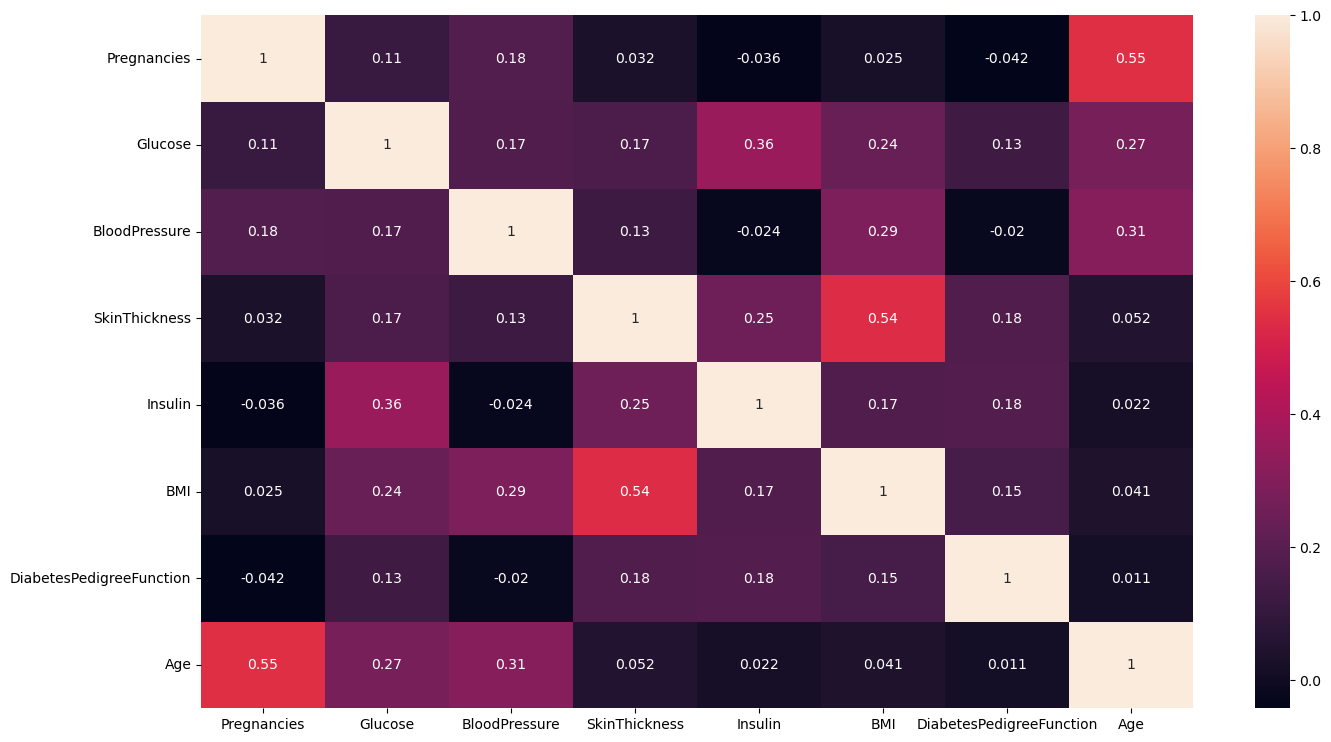

In [24]:
plt.figure(figsize=(16,9))
corr = data1.corr()
sns.heatmap(corr, annot=True)
plt.show()


In [25]:
#data.drop(['Age'],axis = 1)

In [26]:
# training and normalization of data
X = data.iloc[:,:8]
Y = data.iloc[:,8:]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

# SScaler = StandardScaler()
# X_train = SScaler.fit_transform(X_train)
# X_test = SScaler.fit_transform(X_test)

In [29]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train,Y_train)



C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [30]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
443,8,108,70,23,30.5,30.5,0.955,33
377,1,87,60,37,75.0,37.2,0.509,22
380,1,107,72,30,82.0,30.8,0.821,24
339,7,178,84,23,30.5,39.9,0.331,41
757,0,123,72,23,30.5,36.3,0.258,52
...,...,...,...,...,...,...,...,...
655,2,155,52,27,540.0,38.7,0.240,25
435,0,141,72,23,30.5,42.4,0.205,29
638,7,97,76,32,91.0,40.9,0.871,32
42,7,106,92,18,30.5,22.7,0.235,48


In [31]:
Y_test

,Outcome
443,1
377,0
380,0
339,1
757,1
...,...
655,1
435,1
638,1
42,0


In [32]:
Y_pred = svc.predict(X_test)
Y_pred



array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1],
      dtype=int64)

In [33]:
# pd.DataFrame({'Results':list(Y_pred)})

In [34]:
#test accu
svc_accuracy= round(accuracy_score(Y_test,Y_pred),4)*100 # Accuracy
svc_accuracy

74.07000000000001

In [35]:
#train accu
Y_pred = svc.predict(X_train)
svc_accuracy1= round(accuracy_score(Y_train,Y_pred),4)*100 # Accuracy
svc_accuracy1

72.43

In [36]:
d = X_test.iloc[0:1]
d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
443,8,108,70,23,30.5,30.5,0.955,33


In [37]:
Y_test.iloc[0:1]

,Outcome
443,1


In [38]:
Y_pred = svc.predict(X_test.iloc[0:1])
Y_pred

array([0], dtype=int64)

In [39]:
Pregnancies = float(input("Enter Pregnancies = "))
Glucose = float(input("Enter Glucose = "))
BloodPressure = float(input("Enter BloodPressure = "))
SkinThickness = float(input("Enter SkinThickness = "))
Insulin = float(input("Enter Insulin = "))
BMI = float(input("Enter BMI = "))
DiabetesPedigreeFunction = float(input("Enter DiabetesPedigreeFunction = "))
Age = float(input("Enter Age = "))

new_data = {'Pregnancies':[Pregnancies],
            'Glucose':[Glucose],
            'BloodPressure':[BloodPressure],
            'SkinThickness':[SkinThickness],
            'Insulin':[Insulin],
            'BMI':[BMI],
            'DiabetesPedigreeFunction':[DiabetesPedigreeFunction],
            'Age':[Age]
            }
d = pd.DataFrame(new_data)

Enter Pregnancies = 3
Enter Glucose = 77
Enter BloodPressure = 56
Enter SkinThickness = 34
Enter Insulin = 23
Enter BMI = 34
Enter DiabetesPedigreeFunction = 0.45
Enter Age = 44


In [40]:
d


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3.0,77.0,56.0,34.0,23.0,34.0,0.45,44.0


In [41]:
Y_score = svc.predict(d)
print(Y_score)

[0]


In [42]:
Y_pred = svc.predict(X_test)
Y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1],
      dtype=int64)

In [43]:
len(Y_pred)

108

yes 60
No 48


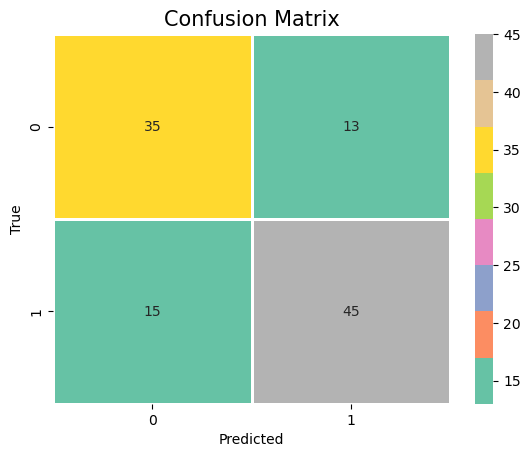

In [44]:
# def impressions(model,accuracy):
# print('Mean squared error: ', round(mean_squared_error(Y_test,Y_pred),3))
Y_pred = svc.predict(X_test)

cm=confusion_matrix(Y_test,Y_pred)
class_label = [0, 1]
print("yes",len(Y_test[Y_test['Outcome'] == True]))
print("No",len(Y_test[Y_test['Outcome'] == False]))

df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
df_cm
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [45]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[35, 13],
       [15, 45]], dtype=int64)

In [46]:
report=classification_report(Y_test,Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.73      0.71        48
           1       0.78      0.75      0.76        60

    accuracy                           0.74       108
   macro avg       0.74      0.74      0.74       108
weighted avg       0.74      0.74      0.74       108



In [47]:
Y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1],
      dtype=int64)